In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## 데이터 불러오기

In [120]:
df = pd.read_csv("../data/bikesharing.csv")

## 데이터 확인

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   year        731 non-null    int64  
 2   month       731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  count       731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


In [122]:
df.describe()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


In [123]:
df.iloc[:,:-1].corr()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046
year,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817
month,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489


In [124]:
df.head(5)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


## 데이터 시각화

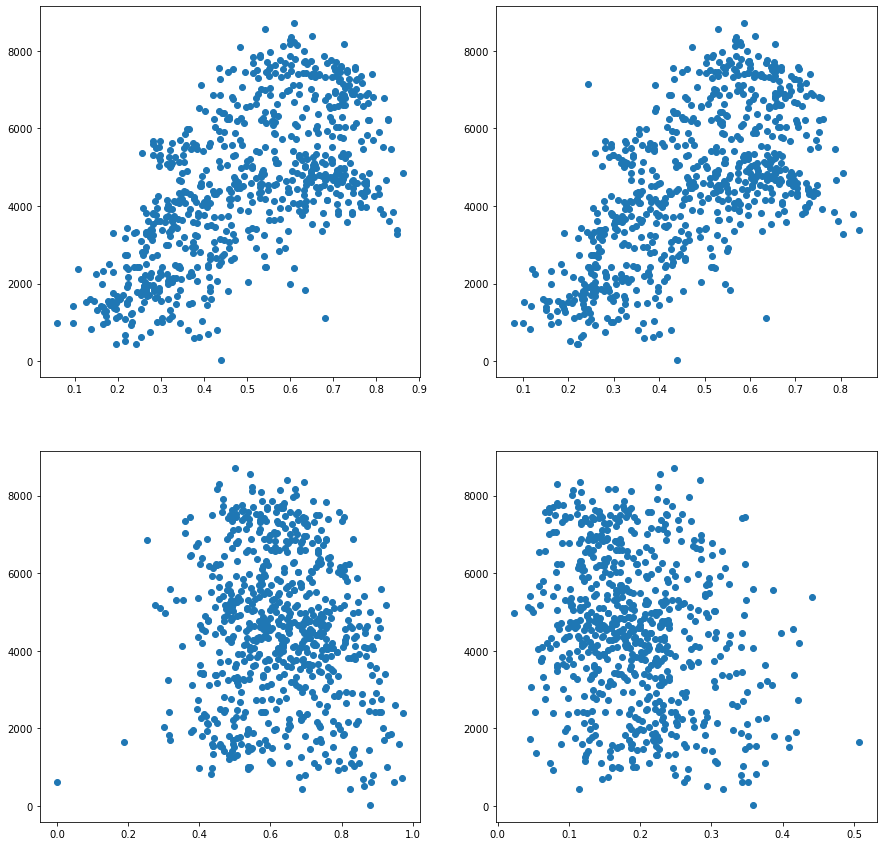

In [125]:
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.scatter(df['temp'], df['count'])
ax2.scatter(df['atemp'], df['count'])
ax3.scatter(df['hum'], df['count'])
ax4.scatter(df['windspeed'], df['count'])

plt.show()

## train, test set 분할

In [126]:
x = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [127]:
x.shape

(731, 11)

In [128]:
y.shape

(731,)

In [129]:
train_input, test_input, train_target, test_target = train_test_split(x, y, random_state=42)

In [130]:
train_input.shape

(548, 11)

In [131]:
train_target.shape

(548,)

# 모델학습

## k-NN Regression

In [132]:
from sklearn.neighbors import KNeighborsRegressor

In [133]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

## 결과 확인

In [135]:
# r-squared
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.8367484407287173
0.7604646754269749


In [173]:
#MAE (Mean Absolute Error)
test_predict = knr.predict(test_input)
print(mean_absolute_error(test_target, test_predict))
print(mean_squared_error(test_target, test_predict, squared = False))

689.9431693989071
960.808690805755


## Linear Regression

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [139]:
# r-squared
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.7887834199213852
0.815895415394237


In [142]:
#MAE (Mean Absolute Error)
test_predict = lr.predict(test_input)
mae = mean_absolute_error(test_target, test_predict)
mse = mean_squared_error(test_target, test_predict, squared = False)
print(mae)
print(mse)

608.3384086565378
842.3342121135311


## Multiple Regression

In [143]:
from sklearn.preprocessing import PolynomialFeatures

In [144]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [145]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [146]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9026090340906128
0.8421643731556635


In [148]:
mean_squared_error(test_target, lr.predict(test_poly), squared=False)

779.9282623905132

## Ridge

In [149]:
from sklearn.linear_model import Ridge

In [150]:
ridge = Ridge()
ridge.fit(train_poly, train_target)

Ridge()

In [151]:
print(ridge.score(train_poly, train_target))
print(ridge.score(test_poly, test_target))

0.8561219938350251
0.8675278384249849


In [152]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_poly, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_poly, train_target))
    test_score.append(ridge.score(test_poly, test_target))

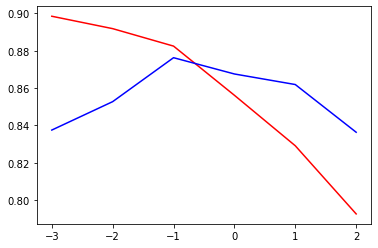

In [153]:
plt.plot(np.log10(alpha_list), train_score, color='red')
plt.plot(np.log10(alpha_list), test_score, color= 'blue')
plt.show()

In [156]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_poly, train_target)

Ridge(alpha=0.1)

In [157]:
print(ridge.score(train_poly, train_target))
print(ridge.score(test_poly, test_target))
print(mean_squared_error(test_target, ridge.predict(test_poly), squared = False))

0.8824487078301967
0.876241502918885
690.6207962500824


## Lasso

In [158]:
from sklearn.linear_model import Lasso

In [159]:
lasso = Lasso()
lasso.fit(train_poly, train_target)

C:\Users\Minki_Kim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108461432.19561541, tolerance: 202333.94169981754
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [160]:
print(lasso.score(train_poly, train_target))
print(lasso.score(test_poly, test_target))

0.879277318038782
0.8766750462105642


In [161]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_poly, train_target)
    
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_poly, train_target))
    test_score.append(lasso.score(test_poly, test_target))

C:\Users\Minki_Kim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100953475.94950265, tolerance: 202333.94169981754
  model = cd_fast.enet_coordinate_descent(
C:\Users\Minki_Kim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96299599.65827273, tolerance: 202333.94169981754
  model = cd_fast.enet_coordinate_descent(
C:\Users\Minki_Kim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81763026.10119984, tolerance: 202333.94169981754
  model = cd_fast.enet_coordinate_descent(


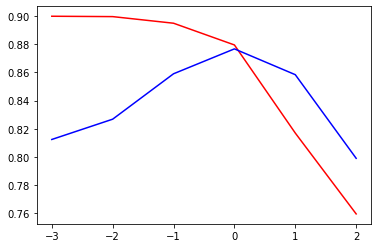

In [109]:
plt.plot(np.log10(alpha_list), train_score, color = 'red')
plt.plot(np.log10(alpha_list), test_score, color = 'blue')
plt.show()

In [162]:
lasso = Lasso(1)
lasso.fit(train_poly, train_target)

C:\Users\Minki_Kim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108461432.19561541, tolerance: 202333.94169981754
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [163]:
print(lasso.score(train_poly, train_target))
print(lasso.score(test_poly, test_target))
print(mean_squared_error(test_target, lasso.predict(test_poly), squared = False))

0.879277318038782
0.8766750462105642
689.4100644500179
